<a href="https://colab.research.google.com/github/ZeynepNazOnel/Yapay-Zeka-Proje-Odevi-1/blob/main/YZSProje1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**YAPAY ZEKA SİSTEMLERİ 1.PROJE ÖDEVİ**

**Adınız:** ZEYNEP NAZ
**Soyadınız:** ÖNEL
**Okul Numaranız:** 2212721036
**GitHub Repo Bağlantısı:**

**Senaryo 6: Kargo Kutusu Tasarımı**

Bir e-ticaret firması, ürünler için optimum kutu ölçülerini belirlemek istiyor.
•
Amaç fonksiyonu: y = x₁ * x₂ - 0.1x₁² - 0.1x₂² (hacim – malzeme maliyeti)
•
Değişkenler:
o
x₁: Genişlik (cm) → [10, 40]
o
x₂: Yükseklik (cm) → [5, 20]
•
Kısıtlar:
o
x₁ * x₂ ≤ 600 (Raf sığdırma sınırı)
o
x₁ ≥ 15

## 📐 Matematiksel Analiz ve Beklenen Sonuç

Kodlamaya geçmeden önce, problemin optimum çözümünü analitik yöntemle hesaplayıp, Genetik Algoritmanın bu sonuca ne kadar yaklaşabildiğini test edeceğiz.

**1. Amaç Fonksiyonu ve Mantık:**
Fonksiyonumuz: $$y = (x_1 \cdot x_2) - 0.1(x_1^2 + x_2^2)$$
Burada $(x_1 \cdot x_2)$ hacim kazancı, $-0.1(...)$ ise malzeme maliyetidir.
Maksimum puan için **alanı (600) en büyük**, **çevre maliyetini en küçük** tutmalıyız. Geometrik olarak, çevre maliyetinin en düşük olduğu dikdörtgen şekli **Kare**dir ($x_1 = x_2$).

**2. Sınır Değer Analizi:**
Raf alanı kısıtı: $$x_1 \cdot x_2 \le 600$$
İdeal durumda kare olması için: $$\sqrt{600} \approx 24.5$$
Ancak $x_2$ (yükseklik) kısıtı maksimum **20 cm**'dir. Bu yüzden $x_2$'yi olabilecek en büyük sınıra sabitliyoruz.

* **x2 (Yükseklik):** 20 cm (Sınır değer)
* **x1 (Genişlik):** Alanı 600 yapmak için $\frac{600}{20} = 30$ cm.

**3. Beklenen Maksimum Skor:**
Bulduğumuz $x_1=30$ ve $x_2=20$ değerlerini formüle koyarsak:
$$Skor = (30 \cdot 20) - 0.1(30^2 + 20^2)$$
$$Skor = 600 - 0.1(900 + 400)$$
$$Skor = 600 - 130 = \mathbf{470}$$

**Sonuç:** Algoritmamızın **x1=30, x2=20** değerlerine ve **470** puanına yakınsaması gerekmektedir.

Kutu Tasarımı Optimize Ediliyor...

--- TASARIM RAPORU ---
Optimum Genişlik (x1) : 30.56 cm
Optimum Yükseklik (x2): 19.61 cm
Maksimum Kazanç       : 467.45


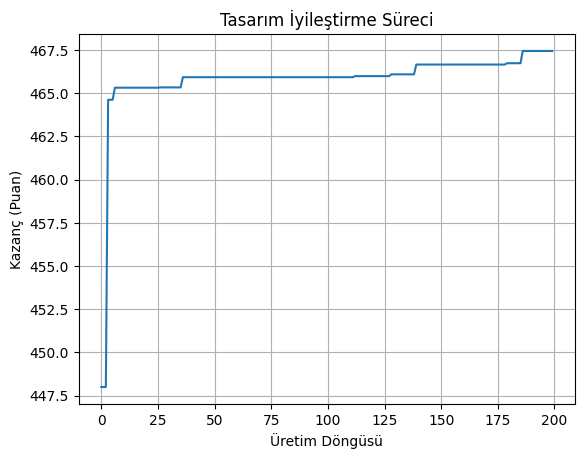

In [3]:
import random
import matplotlib.pyplot as plt

# --- PARAMETRELER ---

tasarim_sayisi = 100        # Üretilecek toplam kutu sayısı
uretim_dongusu = 200        # Üretim döngüsü
degisim_orani = 0.2         # Tasarımda yapılabilecek değişim oranı ihtimali

# Kısıtlar ve Sınırlar (Sorudan alındı)
min_genislik, max_genislik = 10, 40  # x1 sınırları
min_yukseklik, max_yukseklik = 5, 20 # x2 sınırları
raf_siniri = 600               # x1 * x2 sınırı

# --- PERFORMANS ÖLÇÜMÜ (Amaç Fonksiyonu) ---
def kar_hesapla(genislik, yukseklik):
    """
    Bir kutudan ne kadar kar elde edileceğini hesapladım.
    Formül: Hacim - Malzeme Maliyeti
    """

    # --- KISIT KONTROLLERİ ---
    # 1. Kutu rafa sığıyor mu? (Alan 600'den büyükse iptal)
    raf_alani = genislik * yukseklik
    if raf_alani > raf_siniri:
        return -9999 # Rafa sığmıyor

    # 2. Genişlik en az 15 cm mi?
    if genislik < 15:
        return -9999 # Kutu çok dar

    # 3. Sınır dışı üretim hatası var mı?
    if not(min_genislik <= genislik <= max_genislik) or \
       not(min_yukseklik <= yukseklik <= max_yukseklik):
        return -9999

    # --- KAZANÇ HESABI ---
    # Amaç Fonksiyonu: y = x1*x2 - 0.1*x1^2 - 0.1*x2^2
    hacim_puani = (genislik * yukseklik)
    malzeme_maliyeti = 0.1*(genislik**2) + 0.1*(yukseklik**2)

    net_kazanc = hacim_puani - malzeme_maliyeti
    return net_kazanc

# --- TASARIM SÜRECİ (ANA ALGORİTMA) ---

# Adım 1: İlk Rastgele Kutu Tasarımlarını Oluştur
# Her tasarım [Genişlik, Yükseklik] şeklinde saklanır
kutu_tasarimlari = []
for _ in range(tasarim_sayisi):
    rastgele_genislik = random.uniform(min_genislik, max_genislik)
    rastgele_yukseklik = random.uniform(min_yukseklik, max_yukseklik)
    kutu_tasarimlari.append([rastgele_genislik, rastgele_yukseklik])

gecmis_performanslar = [] # Grafiği çizmek için kayıt defteri

print("Kutu Tasarımı Optimize Ediliyor...")

for tur in range(uretim_dongusu):

    # a) KALİTE KONTROL: Tasarımları kazanca göre sırala (En karlısı en başa)
    kutu_tasarimlari = sorted(
        kutu_tasarimlari,
        key=lambda kutu: kar_hesapla(kutu[0], kutu[1]),
        reverse=True
    )

    # En iyi tasarımı kaydet
    en_iyi_kutu = kutu_tasarimlari[0]
    en_yuksek_kazanc = kar_hesapla(en_iyi_kutu[0], en_iyi_kutu[1])
    gecmis_performanslar.append(en_yuksek_kazanc)

    # b) SEÇİM VE ÜRETİM HAVUZU
    yeni_uretim_hatti = []

    # ELITISM: En iyi 5 tasarımı bozmadan sonraki tura aktar
    yeni_uretim_hatti.extend(kutu_tasarimlari[:5])

    # Yeni tasarımlar türet
    while len(yeni_uretim_hatti) < tasarim_sayisi:
        # En iyi 50 tasarım arasından rastgele iki "Model" seç
        iyi_modeller = kutu_tasarimlari[:50]
        model_1 = random.choice(iyi_modeller)
        model_2 = random.choice(iyi_modeller)

        # c) ÇAPRAZLAMA (Tasarım Birleştirme)
        # Genişliği Model 1'den, Yüksekliği Model 2'den al (veya tam tersi)
        if random.random() < 0.5:
            yeni_genislik = model_1[0]
            yeni_yukseklik = model_2[1]
        else:
            yeni_genislik = model_2[0]
            yeni_yukseklik = model_1[1]

        # d) MUTASYON (Ar-Ge Değişikliği)
        # Tasarımda %20 ihtimalle ufak değişiklikler yap
        if random.random() < degisim_orani:
            if random.random() < 0.5:
                # Küçük ayar yap (+- 1 cm oyna)
                yeni_genislik += random.uniform(-1, 1)
                yeni_yukseklik += random.uniform(-1, 1)
            else:
                # Tamamen yeni bir ölçü dene (Sıkışmayı önlemek için)
                if random.random() < 0.5:
                    yeni_genislik = random.uniform(min_genislik, max_genislik)
                else:
                    yeni_yukseklik = random.uniform(min_yukseklik, max_yukseklik)

        # Üretim bandından taşmaları düzelt (Sınırların içine çek)
        yeni_genislik = max(min_genislik, min(max_genislik, yeni_genislik))
        yeni_yukseklik = max(min_yukseklik, min(max_yukseklik, yeni_yukseklik))

        yeni_uretim_hatti.append([yeni_genislik, yeni_yukseklik])

    kutu_tasarimlari = yeni_uretim_hatti

# --- 4. RAPORLAMA ---
print("\n--- TASARIM RAPORU ---")
print(f"Optimum Genişlik (x1) : {en_iyi_kutu[0]:.2f} cm")
print(f"Optimum Yükseklik (x2): {en_iyi_kutu[1]:.2f} cm")
print(f"Maksimum Kazanç       : {en_yuksek_kazanc:.2f}")

plt.plot(gecmis_performanslar)
plt.title("Tasarım İyileştirme Süreci")
plt.xlabel("Üretim Döngüsü")
plt.ylabel("Kazanç (Puan)")
plt.grid(True)
plt.show()